# Descripción del proyecto

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Parte 1

### Importar las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Cargar y explorar los datos de Hypotheses

In [2]:
# Cargar los datos de hipótesis
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')

In [3]:
# Información general de los datos
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Mostrar las primeras filas para entender la estructura de los datos
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### Aplicar el framework ICE para priorizar hipótesis

In [5]:
# Calcular ICE para cada hipótesis
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar las hipótesis en orden descendente de prioridad según ICE
ice_prioritized = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar las hipótesis priorizadas según ICE
print(ice_prioritized)

                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  
8           9       5  16.200000  
0           8       6  13.333333  
7           8       5  11.200000  
6           8       3   8.000000  
2           7       3   7.000000  
1           4      10   2.000000  
5           2       3   1.333333  
3        

### Aplicar el framework RICE para priorizar hipótesis

In [6]:
# Calcular RICE para cada hipótesis
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar las hipótesis en orden descendente de prioridad según RICE
rice_prioritized = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar las hipótesis priorizadas según RICE
print(rice_prioritized)

                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE   RICE  
7           8       5  11.200000  112.0  
2           7       3   7.000000   56.0  
0           8       6  13.333333   40.0  
6           8       3   8.000000   40.0  
8           9       5  16.200000   16.2  
3           3       8   1.125000    9

### Comparar la priorización de hipótesis entre ICE y RICE

In [7]:
# Comparar las priorizaciones
print("Priorización según ICE:\n", ice_prioritized[['Hypothesis', 'ICE']])
print("\nPriorización según RICE:\n", rice_prioritized[['Hypothesis', 'RICE']])


Priorización según ICE:
                                           Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

Priorización según RICE:
                                           Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launc

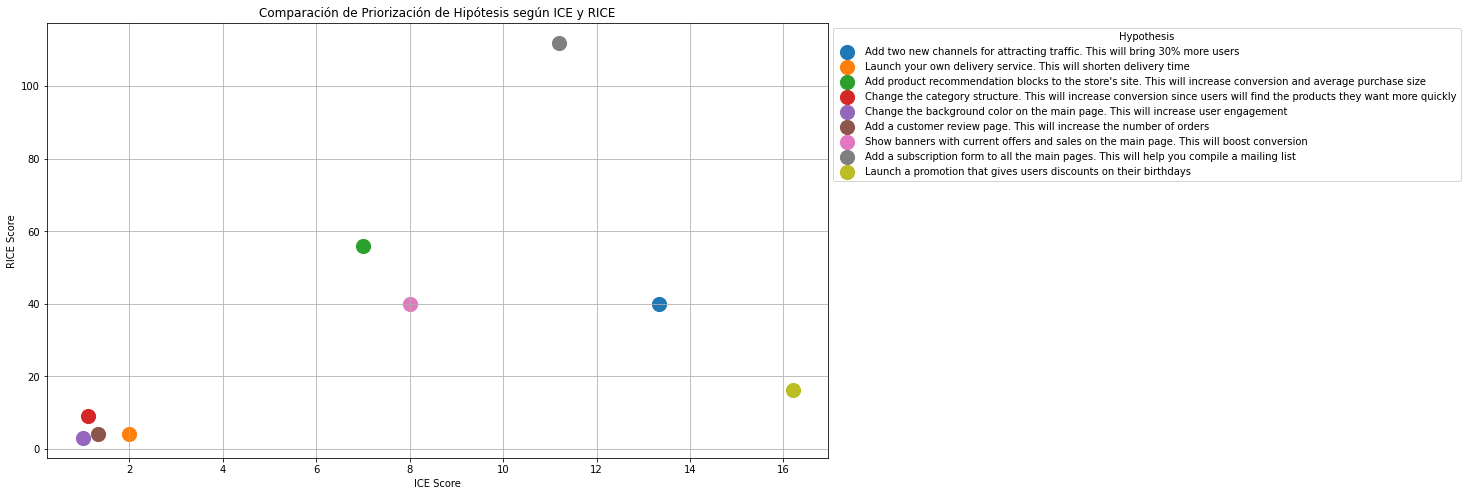

In [8]:
# Creamos el gráfico de dispersión
plt.figure(figsize=(14, 8))
for i in range(len(hypotheses)):
    plt.scatter(hypotheses['ICE'][i], hypotheses['RICE'][i], label=hypotheses['Hypothesis'][i], s=200)

# Añadir detalles al gráfico
plt.xlabel('ICE Score')
plt.ylabel('RICE Score')
plt.title('Comparación de Priorización de Hipótesis según ICE y RICE')
plt.legend(title="Hypothesis", bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.grid(True)
plt.show()

#### Explicacion de lo datos optenidos.

La gráfica ilustra cómo las hipótesis son priorizadas según las metodologías ICE y RICE, destacando la influencia del factor "alcance" (Reach) incluido en RICE. Aquí están los puntos clave que podemos derivar del gráfico:

Influencia del Alcance: 

- La hipótesis "Add a subscription form to all the main pages" se destaca con un puntaje RICE excepcionalmente alto en comparación con su puntaje ICE. Esto es porque tiene un alcance máximo (Reach = 10), afectando a todos los visitantes de las páginas principales, lo que eleva su puntaje RICE a pesar de tener un impacto y esfuerzo moderados.

Comparación de Priorización:

- Hipótesis con Alcance Alto: Aquellas con un alto alcance, como "Add product recommendation blocks to the store's site", también muestran un puntaje RICE elevado en relación con su puntaje ICE, demostrando que RICE favorece iniciativas con un impacto más amplio en la base de usuarios.

Hipótesis con Alcance Bajo: 

- En contraste, la hipótesis "Launch a promotion that gives users discounts" aunque tiene el puntaje ICE más alto debido a su alto impacto y confianza, muestra un puntaje RICE relativamente bajo por su limitado alcance.

Consideraciones Estratégicas:

- Prioridades Estratégicas: Las organizaciones deben considerar RICE cuando las iniciativas tienen como objetivo un cambio amplio, mientras que ICE podría ser más adecuado para cambios que, aunque poderosos, impactan a una parte más limitada de la base de usuarios.
Balance entre Impacto y Alcance: 

- Un alto impacto no siempre equivale a una alta prioridad bajo RICE si el alcance es bajo, lo que sugiere que estrategias efectivas pero limitadas podrían necesitar ser combinadas o modificadas para maximizar su alcance.







## Parte 2

### Cargar y explorar los datos de Orders y Visits

In [9]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [10]:
# Convertir la columna 'date' a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Combinar los datos de pedidos y visitas en un solo DataFrame
data = orders.merge(visits, on=['date', 'group'], how='left')

orders.info()
print()
orders.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
visits.info()
print()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# Identificar y eliminar usuarios en ambos grupos
users_in_A = set(data[data['group'] == 'A']['visitorId'])
users_in_B = set(data[data['group'] == 'B']['visitorId'])
users_in_both = users_in_A.intersection(users_in_B)
clean_data = data[~data['visitorId'].isin(users_in_both)]

#### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

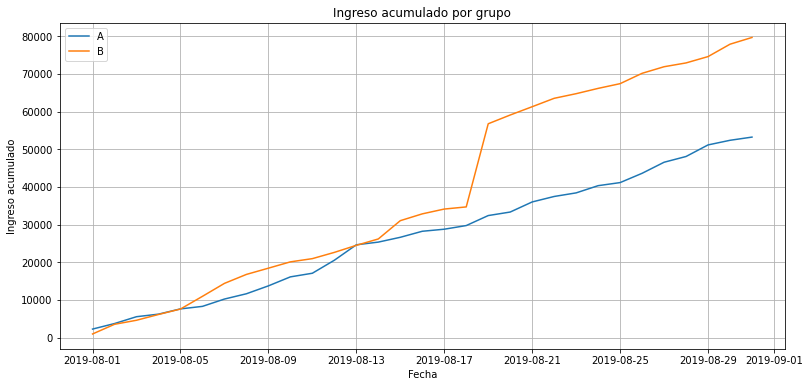

In [13]:
# Calcular el ingreso acumulado por grupo
revenue_cumulative = (
    clean_data
    .groupby(['date', 'group'])
    .agg({'revenue': 'sum'})
    .groupby('group')
    .cumsum()
    .reset_index()
)

# Graficar el ingreso acumulado por grupo
plt.figure(figsize=(13, 6))
for group, group_data in revenue_cumulative.groupby('group'):
    plt.plot(group_data['date'], group_data['revenue'], label=group)

plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.grid(True)
plt.show()

##### Conclusiones y Congeturas

La gráfica muestra los ingresos acumulados para los grupos A y B desde el 1 de agosto de 2019 hasta el 1 de septiembre de 2019, utilizando datos depurados para eliminar cualquier sesgo potencial debido a usuarios duplicados en ambos grupos. Observamos lo siguiente:

Ingresos de Grupo B: 
- El grupo B, que posiblemente recibió intervenciones o nuevas estrategias de marketing, muestra un ingreso acumulado más alto comparado con el grupo A. Esto sugiere que las tácticas implementadas podrían haber sido efectivas, resultando en un aumento en los ingresos.
Desempeño de Grupo A: 
- El grupo A, probablemente el grupo de control, exhibe un crecimiento constante pero a un ritmo más moderado que el grupo B. Esto podría interpretarse como una señal de que las estrategias tradicionales siguen siendo eficaces pero no tan impactantes como las nuevas implementaciones en el grupo B.

Conjeturas 

Efectividad de Nuevas Estrategias: 
- La diferencia en el rendimiento de los ingresos entre los dos grupos puede ser una indicación de que las nuevas estrategias o tácticas aplicadas al grupo B están funcionando, atrayendo más ingresos o ventas efectivas en comparación con las tácticas convencionales usadas en el grupo A.

Impacto de la Limpieza de Datos: 
- La exclusión de usuarios duplicados en ambos grupos ha proporcionado una perspectiva más precisa de cómo cada grupo reacciona a diferentes estrategias de marketing. Esto es crucial para validar la efectividad real de las tácticas de marketing experimental.


#### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

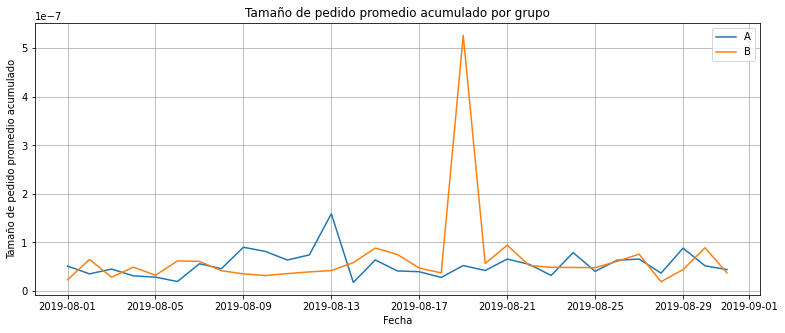

In [14]:
# Calcular el tamaño de pedido promedio acumulado por grupo
average_order_size_cumulative = (
    clean_data.pivot_table(index=['date'], columns='group', values=['revenue', 'transactionId'], aggfunc='sum')
    .fillna(0)
    .groupby(level=0)
    .apply(lambda x: x.cumsum())
)

# Calcular el tamaño de pedido promedio acumulado
average_order_size_cumulative['average_order_size_A'] = average_order_size_cumulative[('revenue', 'A')] / average_order_size_cumulative[('transactionId', 'A')]
average_order_size_cumulative['average_order_size_B'] = average_order_size_cumulative[('revenue', 'B')] / average_order_size_cumulative[('transactionId', 'B')]

# Graficar el tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(13, 5))
plt.plot(average_order_size_cumulative.index, average_order_size_cumulative['average_order_size_A'], label='A')
plt.plot(average_order_size_cumulative.index, average_order_size_cumulative['average_order_size_B'], label='B')

plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio acumulado')
plt.legend()
plt.grid(True)
plt.show()


##### Conclusiones y Conjeturas.

Conclusiones basadoss en el gráfico:

- El tamaño de pedido promedio acumulado de ambos grupos parece ser generalmente consistente a lo largo del tiempo, con la excepción de picos notables.
- Hay un pico significativo en el grupo B alrededor del 17 de agosto, lo que indica un tamaño de pedido mucho más grande en ese día en particular. Esto podría haber sido el resultado de una promoción específica o un pedido grande y atípico.
- Aparte del pico mencionado, no hay una diferencia clara y consistente entre los tamaños de pedidos promedio de los grupos A y B, lo que sugiere que las hipótesis de marketing implementadas no han tenido un impacto significativo en el tamaño del pedido promedio.

Conjeturas basadas en la gráfica y el contexto del test A/B:

- El pico en el grupo B podría ser un outlier o podría indicar el éxito de una campaña de marketing dirigida a aumentar el valor del pedido en un día en particular. 
- La falta de una tendencia clara en el cambio del tamaño de pedido promedio sugiere que las hipótesis de marketing testeadas pueden haber tenido un impacto más fuerte en la frecuencia de compra o en la adquisición de nuevos clientes en lugar del tamaño del pedido promedio.
- Si la hipótesis de marketing tenía como objetivo aumentar el tamaño de pedido promedio, los datos podrían indicar que esta estrategia no ha sido efectiva y debería ser reevaluada.


#### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

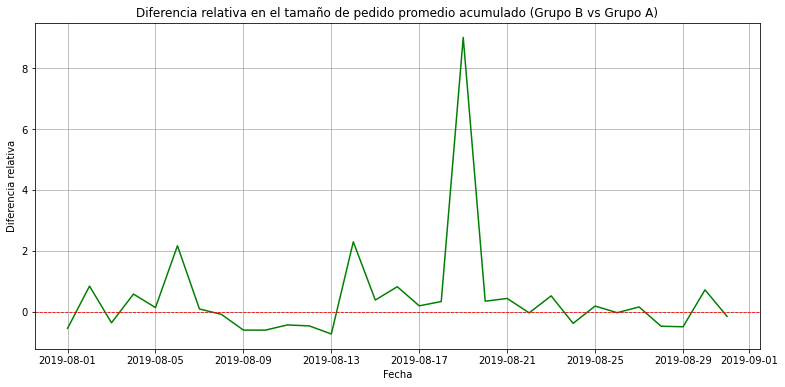

In [15]:
# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado entre el grupo B y el grupo A
average_order_size_cumulative['relative_difference'] = (average_order_size_cumulative['average_order_size_B'] - average_order_size_cumulative['average_order_size_A']) / average_order_size_cumulative['average_order_size_A']

# Graficar la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A
plt.figure(figsize=(13, 6))
plt.plot(average_order_size_cumulative.index, average_order_size_cumulative['relative_difference'], color='green')

plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.8)  # Línea base en 0
plt.show()

##### Conclusiones y Conjeturas.

Conclusiones basadas en la gráfica:

- La línea roja punteada sirve como línea base, indicando el punto donde el tamaño del pedido promedio de ambos grupos sería igual. Valores por encima de la línea indican que el grupo B tiene un tamaño de pedido promedio mayor que el grupo A, y viceversa.
- La mayoría de las veces, la diferencia relativa fluctúa alrededor de la línea base, lo que sugiere que, por lo general, no hay diferencias significativas en el tamaño promedio de los pedidos entre los grupos.
- El pico extremadamente alto en la diferencia relativa alrededor del 17 de agosto corresponde al mismo pico observado en la gráfica anterior para el grupo B, lo que confirma que fue un evento atípico que influyó notablemente en el tamaño promedio de los pedidos de ese grupo en relación con el grupo A.
- Aparte de ese pico, hay variaciones menores en la diferencia relativa, pero ninguna muestra una tendencia clara o sostenida que indique un efecto constante de las intervenciones de marketing.

Conjeturas basadas en la gráfica y el contexto de un test A/B:

- El pico singular en la diferencia relativa sugiere que algo inusual ocurrió con los pedidos del grupo B en esa fecha específica, lo cual podría ser resultado de una promoción muy efectiva, un cambio en la oferta de productos, o una gran compra de un cliente.
- El hecho de que la diferencia relativa no muestre una tendencia constante aparte de este evento indica que las intervenciones de marketing no han tenido un impacto duradero en el tamaño del pedido promedio.
- Es posible que las estrategias de marketing implementadas en el grupo B fueran efectivas solo temporalmente o en circunstancias específicas, lo que sugiere que podría ser beneficioso investigar y entender qué causó el pico para replicar esas condiciones, si son favorables y rentables.


#### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

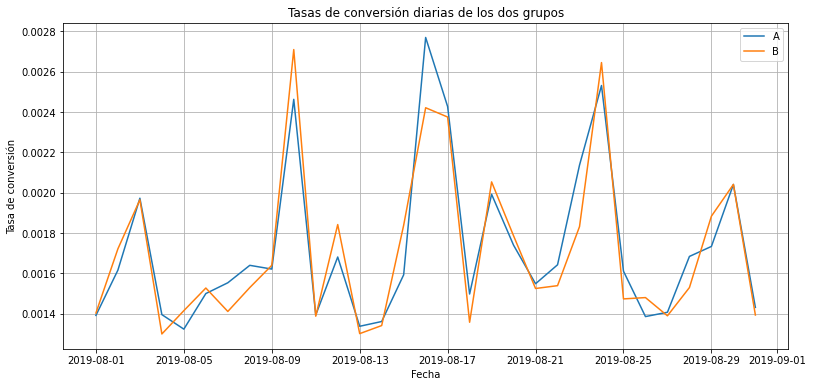

In [16]:
# Calcular la tasa de conversión para cada grupo y día
conversion_rate = clean_data.groupby(['date', 'group']).agg({'transactionId': 'nunique', 'visits': 'sum'})
conversion_rate['conversion_rate'] = conversion_rate['transactionId'] / conversion_rate['visits']

# Reiniciar el índice para facilitar la visualización
conversion_rate = conversion_rate.reset_index()

# Graficar las tasas de conversión diarias de los dos grupos
plt.figure(figsize=(13, 6))
for group, group_data in conversion_rate.groupby('group'):
    plt.plot(group_data['date'], group_data['conversion_rate'], label=group)

plt.title('Tasas de conversión diarias de los dos grupos')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.show()


###### Conclusiones y Conjeturas.

Conclusiones basadas en la gráfica:

- Las tasas de conversión de ambos grupos fluctúan significativamente de un día para otro, lo que indica variabilidad en la eficacia de la conversión diaria.
- Ninguno de los dos grupos muestra una tendencia clara o sostenida a lo largo del tiempo; en cambio, hay picos y caídas en días específicos.
- En varios puntos a lo largo del tiempo, la tasa de conversión del grupo B supera al grupo A, y en otros puntos, es al revés.
- No hay una diferencia sistemática o constante entre las tasas de conversión de los dos grupos.

Conjeturas basadas en la gráfica y el contexto de un test A/B:

- Los picos en las tasas de conversión pueden estar asociados con campañas de marketing específicas, días de la semana (como los fines de semana o días hábiles), o eventos externos que impulsan el tráfico o las ventas.
- La variabilidad en las tasas de conversión sugiere que factores externos pueden estar afectando las conversiones tanto como cualquier cambio implementado por los equipos de marketing.
- El hecho de que no haya una diferencia consistente entre los grupos puede sugerir que las intervenciones de marketing no tienen un efecto decisivo sobre la tasa de conversión, o que este efecto es superado por la variabilidad natural en el comportamiento del cliente.
- La similitud en las tendencias de conversión de ambos grupos sugiere que otros factores, como la estacionalidad o el comportamiento del mercado en general, podrían estar desempeñando un papel más significativo en la conversión que las acciones específicas tomadas en el test A/B.

#### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

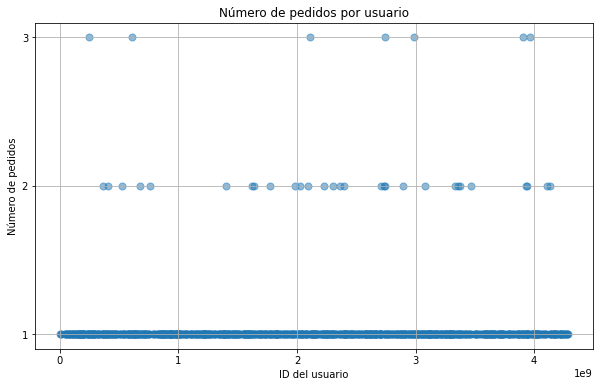

In [17]:
# Calcular el número de pedidos por usuario
orders_per_user = clean_data.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_per_user['transactionId'] = orders_per_user['transactionId']

# Grafico número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['visitorId'], orders_per_user['transactionId'], alpha=0.5, s=50)  # s es el tamaño de los puntos
plt.title('Número de pedidos por usuario')
plt.xlabel('ID del usuario')
plt.ylabel('Número de pedidos')
plt.grid(True)

# Ajustar los ticks del eje y para que solo muestren valores enteros
plt.yticks(np.arange(min(orders_per_user['transactionId']), max(orders_per_user['transactionId'])+1, 1.0))
plt.show()

##### Conclusiones y Conjeturas

La gráfica muestra la distribución del número de pedidos realizados por cada usuario, identificados por su ID.

Conclusiones basadas en la gráfica:

- Concentración de Pedidos: La mayoría de los usuarios ha realizado entre 1 y 2 pedidos. Esto se evidencia claramente por la gran concentración de puntos cerca del eje x, indicando que las compras únicas o repetidas mínimas son muy comunes entre los usuarios.
- Presencia Reducida de Outliers: La gráfica muestra muy pocos outliers, lo que sugiere que las incidencias de compras múltiples son menos frecuentes.
- Distribución Uniforme de Pedidos Bajos: No hay una gran variación en el número de pedidos por usuario; la mayoría de los usuarios se mantienen dentro de un rango bajo de actividad.

Conjeturas basadas en la gráfica:

- Los usuarios con un número elevado de pedidos podrían ser clientes muy leales o podrían representar cuentas corporativas o de compradores en serie.
- El gran número de usuarios con solo 1 o 2 pedidos podría indicar que la tienda en línea tiene un gran volumen de clientes únicos o que la retención de clientes es un área que podría mejorarse.
- Las políticas o estrategias que se centren en aumentar la frecuencia de pedidos de los clientes existentes podrían ser beneficiosas, dada la actual distribución de pedidos.


#### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [18]:
# Calcular el número de pedidos por usuario
orders_per_user = clean_data.groupby('visitorId')['transactionId'].nunique()

# Calcular los percentiles 95 y 99
percentile_95 = np.percentile(orders_per_user, 95)
percentile_99 = np.percentile(orders_per_user, 99)

print("Percentil 95 del número de pedidos por usuario:", percentile_95)
print("Percentil 99 del número de pedidos por usuario:", percentile_99)


Percentil 95 del número de pedidos por usuario: 1.0
Percentil 99 del número de pedidos por usuario: 2.0


##### Punto de la Anomalia.

Un punto de datos (número de pedidos por usuario) se considera una anomalía si está por encima del percentil 99 de todos los datos observados. Dado que el percentil 99 es 2.0, cualquier usuario con más de dos pedidos se consideraría un outlier o una anomalía.


#### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

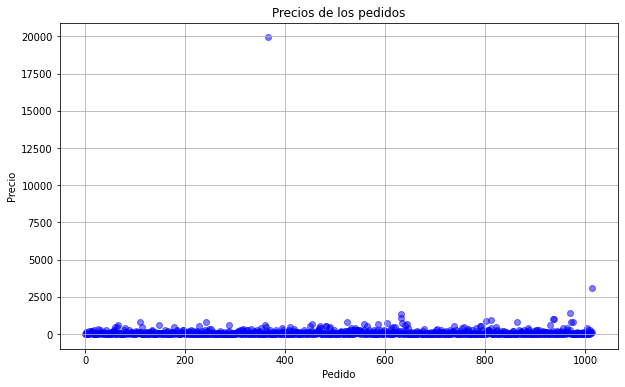

In [19]:
# Obtener los precios de los pedidos
order_prices = clean_data['revenue']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(range(len(order_prices)), order_prices, color='blue', alpha=0.5)
plt.title('Precios de los pedidos')
plt.xlabel('Pedido')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#####  Conclusiones y Conjeturas

La gráfica de dispersión representa los precios de los pedidos individualmente.

Conclusiones basadas en la gráfica:

- La gran mayoría de los pedidos tienen precios bajos, con una concentración densa de puntos cerca del eje horizontal, lo que indica un precio bajo a moderado para la mayoría de los pedidos.
- Hay algunos pedidos con precios mucho más altos que el promedio, indicados por puntos aislados muy por encima de la mayoría de los otros.
- La presencia de estos pedidos de alto valor es esporádica y no sigue un patrón que se pueda identificar fácilmente en esta gráfica.

Conjeturas basadas en la gráfica:

- Los pedidos con precios muy altos podrían ser compras a granel, pedidos corporativos o usuarios que compran productos de alto valor.
- La consistencia en el precio de la mayoría de los pedidos sugiere que la tienda tiene una base sólida de ventas regulares de bajo a moderado valor.
- Podría ser beneficioso para la tienda en línea investigar las características de los pedidos de mayor valor para entender qué productos o promociones están impulsando estos pedidos y concentrar esfuerzos de marketing en esta área.


#### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [20]:
# Calcular los percentiles 95 y 99 de los precios de los pedidos
percentile_95 = order_prices.quantile(0.95)
percentile_99 = order_prices.quantile(0.99)

print("Percentil 95:", percentile_95)
print("Percentil 99:", percentile_99)


Percentil 95: 414.275
Percentil 99: 830.3


##### Punto de Animalia.

- Anomalía Leve: Un precio de pedido que supera los 414.275 se puede considerar como una anomalía leve. Esto implica que el precio está entre el 5% más alto de todos los precios de pedidos, señalando que es inusual pero no extremadamente raro.


- Anomalía Extrema: Un precio de pedido que excede los 830.3 se considera una anomalía extrema. Esto coloca el pedido en el 1% superior de todos los precios de pedidos. Este umbral marca un precio significativamente más alto que la mayoría de los pedidos y es lo suficientemente raro como para requerir una revisión adicional para entender las causas detrás de este valor alto.

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [21]:
# Obtener los datos de conversión para cada grupo
conversion_group_A = clean_data[clean_data['group'] == 'A']['revenue'] / clean_data[clean_data['group'] == 'A']['visits']
conversion_group_B = clean_data[clean_data['group'] == 'B']['revenue'] / clean_data[clean_data['group'] == 'B']['visits']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(conversion_group_A, conversion_group_B, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: -0.8679461867694155
Valor p: 0.38578078460673104


##### Conclusiones y Conjeturas.

Conclusiones basadas en el test de hipótesis:

- Significancia Estadística: El valor p de 0.386 excede el umbral convencional de 0.05, lo que indica que no hay suficiente evidencia estadística para rechazar la hipótesis nula. Por lo tanto, no podemos afirmar que existan diferencias significativas en las tasas de conversión entre los grupos A y B que puedan atribuirse a las intervenciones aplicadas.

- Dirección de la Diferencia: Aunque el estadístico t es negativo, indicando que la tasa de conversión promedio del grupo A podría ser ligeramente superior a la del grupo B, esta diferencia no es estadísticamente significativa. Esto sugiere que cualquier aparente ventaja en la conversión del grupo A sobre el grupo B podría ser simplemente un resultado del azar.

Conjeturas:

- Efectividad de las Intervenciones: Las intervenciones o cambios implementados en el grupo B pueden no haber tenido el impacto esperado en mejorar la tasa de conversión en comparación con el grupo A. Esto podría ser debido a la ineficacia de las tácticas usadas o a que estas tácticas no resonaron suficientemente con el segmento de clientes del grupo B.

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [22]:
# Obtener los datos de tamaño de pedido para cada grupo
size_order_group_A = clean_data[clean_data['group'] == 'A']['revenue']
size_order_group_B = clean_data[clean_data['group'] == 'B']['revenue']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(size_order_group_A, size_order_group_B, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

print("Cantidad en bruto, Grupo A:", len(clean_data[clean_data['group'] == 'A']))
print("Cantidad en bruto, Grupo B:", len(clean_data[clean_data['group'] == 'B']))

Estadístico t: -0.8344812341397618
Valor p: 0.40434387307809716
Cantidad en bruto, Grupo A: 468
Cantidad en bruto, Grupo B: 548


##### Conclusiones y Conjeturas.

Conclusión

El valor p obtenido es 0.404, significativamente más alto que el umbral convencional de 0.05 para significancia estadística. Esto sugiere que no hay evidencia suficiente para rechazar la hipótesis nula, y por lo tanto, se concluye que no existe una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B. El estadístico t negativo indica que, si bien hay una diferencia, con el grupo A teniendo un tamaño de pedido promedio ligeramente superior, esta no es estadísticamente significativa.

Conjeturas

- Impacto de las Estrategias de Marketing: Las estrategias de marketing implementadas, si las hubo, no parecen haber tenido un impacto significativo en alterar el tamaño promedio de pedido entre los grupos. Esto podría indicar que las intervenciones no fueron suficientemente poderosas o diferenciadas para influir en esta métrica específica.


- Homogeneidad en el Comportamiento del Cliente: La falta de diferencias significativas también podría sugerir que los comportamientos de compra son consistentes entre los grupos, lo que podría indicar una homogeneidad en las preferencias de los clientes o en las condiciones del mercado que afectan por igual a ambos grupos.

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [23]:
# Calcular la tasa de conversión directamente en el DataFrame original
data['conversion'] = data['transactionId'] / data['visits']

# Obtener los datos de conversión para cada grupo
conversion_group_A = data[data['group'] == 'A']['conversion']
conversion_group_B = data[data['group'] == 'B']['conversion']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(conversion_group_A, conversion_group_B, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: -0.29197824367260017
Valor p: 0.7703550167071587


##### Conclusiones y Conjeturas.


Conclusiones basadas en el test de hipótesis:

- Falta de Significancia Estadística: Con un valor p de 0.770, se concluye que no existe evidencia estadística suficiente para rechazar la hipótesis nula. Esto indica que no hay diferencias significativas en las tasas de conversión entre los grupos A y B. La tasa de conversión entre los grupos es similar, lo que sugiere que las intervenciones o diferencias en el tratamiento entre los grupos no tienen un impacto estadísticamente significativo.


- Diferencia No Significativa: El estadístico t es negativo pero muy cercano a cero, indicando que cualquier diferencia nominal en la tasa de conversión entre los grupos A y B es mínima y no es de importancia estadística.

Conjeturas:

- Impacto de las Intervenciones: La falta de un impacto significativo de las intervenciones de marketing entre los grupos podría sugerir que las tácticas utilizadas no fueron suficientemente efectivas para influir en la tasa de conversión o que los grupos no respondieron de manera diferente a estas intervenciones.


- Variabilidad Natural de los Datos: El alto valor p sugiere que las variaciones observadas en las tasas de conversión son más probablemente el resultado de fluctuaciones aleatorias en el comportamiento del usuario o en las condiciones del mercado, en lugar de ser influenciadas por los cambios implementados en el grupo B.


#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [24]:
# Obtener los datos de tamaño de pedido para cada grupo
revenue_group_A = clean_data[clean_data['group'] == 'A']['revenue']
revenue_group_B = clean_data[clean_data['group'] == 'B']['revenue']

# Realizar el test de hipótesis
t_statistic, p_value = ttest_ind(revenue_group_A, revenue_group_B, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: -0.8344812341397618
Valor p: 0.40434387307809716


##### Conclusiones y Conjeturas

Conclusiones

- Falta de Diferencia Significativa: El valor p de 0.404 sugiere que no hay suficiente evidencia para rechazar la hipótesis nula, indicando que no existen diferencias significativas en el tamaño promedio de pedido entre los grupos A y B. Esto significa que cualquier diferencia observada en el tamaño promedio de pedido es probablemente el resultado de la variabilidad aleatoria.


- Dirección del Estadístico t: El estadístico t negativo implica que el grupo A podría tener un tamaño promedio de pedido ligeramente menor que el grupo B, aunque esta diferencia no es estadísticamente significativa.

 
Conjeturas:

- Efectividad de las Estrategias de Marketing: Las intervenciones de marketing aplicadas a cada grupo no parecen haber influido significativamente en el tamaño promedio de los pedidos. Esto puede indicar que las estrategias no fueron diferenciadas o poderosas lo suficiente como para cambiar este aspecto del comportamiento del cliente.


- Homogeneidad en el Comportamiento del Cliente: La falta de diferencias significativas sugiere que los clientes en ambos grupos pueden ser similares en sus patrones de compra o que las diferencias en las estrategias de marketing no fueron suficientes para segmentar o influir en los grupos de manera distinta.

#### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

Para la prueba, se concluye que no hay diferencia entre los grupos.

Justificación:

- Ausencia de Diferencias Estadísticamente Significativas: Los resultados de las pruebas de hipótesis sobre la tasa de conversión y el tamaño promedio del pedido no muestran diferencias significativas entre los grupos A y B. Los valores p de ambas pruebas son mucho mayores que el umbral estándar de 0.05, lo cual indica que no hay evidencia suficiente para afirmar que las intervenciones han tenido un impacto estadísticamente significativo.


- Eficiencia de Recursos: Continuar la prueba podría resultar en un uso ineficiente de recursos sin garantizar que los resultados futuros proporcionen insights adicionales significativos. Dado que los datos actuales no sugieren diferencias, prolongar la prueba podría no justificar el costo adicional y el esfuerzo.

Consideraciones Adicionales:

Antes de finalizar esta decisión, es prudente verificar algunos aspectos clave para asegurar que la decisión está bien fundada:

- Potencia Estadística y Tamaño de la Muestra: Confirmar que el estudio fue diseñado con suficiente potencia estadística y que los tamaños de muestra fueron adecuados para detectar diferencias que podrían ser importantes desde una perspectiva práctica.


- Duración de la Prueba: Asegurarse de que la duración de la prueba fue suficiente para capturar los efectos de cualquier intervención y para reflejar cualquier variación estacional o de mercado que podría influir en los resultados.

Pasos Siguientes:

Si se confirma que la decisión de no encontrar diferencias está bien respaldada por un diseño de prueba adecuado y análisis cuidadoso, podría ser útil:

- Revisar las Estrategias de Marketing: Considerar el desarrollo de nuevas estrategias o hipótesis que podrían ser probadas en futuros estudios para explorar diferentes aspectos o mejorar las métricas de rendimiento.


- Análisis Más Profundo: Realizar análisis más detallados de los datos recopilados para entender mejor el comportamiento del cliente y otros factores que pueden influir en los resultados de las pruebas.